<a href="https://colab.research.google.com/github/C0rreia8/Machine_Learning_Project/blob/Duarte/Data_Preparation_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE


# embedded methods
from sklearn.linear_model import LassoCV

# Import the dataset

In [9]:
train_data = pd.read_csv('train_data.csv')
train_data

<ipython-input-9-4cb44b23424c>:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train_data.csv')


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593466,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593467,2022-12-13,72.0,N,2022-12-31,N,0.00,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,...,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
593468,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Change the way the output appears

In [10]:
# Alterar a configuração do pandas para exibir todas as colunas
pd.set_option('display.max_columns', None)

# Agora ao exibir o DataFrame, todas as colunas serão mostradas
train_data.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


#Data pre-processing

Insert a new AccidentID to each row to make it easier to make some validations in the future

In [11]:
#train_data['AccidentID'] = range(1, len(train_data) + 1)
#cols = ['AccidentID'] + [col for col in train_data.columns if col != 'AccidentID']
#train_data = train_data[cols]

# Ajustar o 'AccidentID' para começar em 1
#train_data.set_index(keys = 'AccidentID', inplace = True) #= train_data.index + 1  # Adiciona 1 ao índice

# Remover a coluna auxiliar que não tem nome
#train_data.reset_index(drop=True, inplace=True)  # Remove o índice antigo, se ele estiver como coluna

# Verificar o DataFrame resultante
#train_data

<a class="anchor" id="4th-bullet">


### Dealing with the missing values
</a>

In [12]:
train_data.isna().sum()

,0
Accident Date,23134
Age at Injury,19445
Alternative Dispute Resolution,19445
Assembly Date,0
Attorney/Representative,19445
Average Weekly Wage,48096
Birth Year,48523
C-2 Date,34005
C-3 Date,406226
Carrier Name,19445


There are a lot of missing values on the dataset: \
WCIO and Industry pairs have the same missing values \
OIICS has every row a NA **drop it** \
WCB Decision, Agreement Reached, Number of Dependents and Medical Fee have the same number of Na, **check it** \
C-3 Date and IME-4 Count have a lot of missing values **check it**

Drops OIICS

In [13]:
train_data.drop('OIICS Nature of Injury Description', axis = 1, inplace = True)
train_data

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593466,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327160035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593467,2022-12-13,72.0,N,2022-12-31,N,0.00,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,6165075,2. NON-COMP,SULLIVAN,N,BINGHAMTON,NaN,F,NaN,48.0,TRANSPORTATION AND WAREHOUSING,I,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
593468,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249875936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120584215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check the WCIO pairs

In [14]:
train_data[train_data['WCIO Cause of Injury Code'].isna()]['WCIO Cause of Injury Description']

,WCIO Cause of Injury Description
3,NaN
33,NaN
37,NaN
42,NaN
51,NaN
...,...
593465,NaN
593466,NaN
593468,NaN
593469,NaN


In [15]:
train_data[train_data['WCIO Nature of Injury Code'].isna()]['WCIO Nature of Injury Description']

,WCIO Nature of Injury Description
3,NaN
33,NaN
37,NaN
42,NaN
51,NaN
...,...
593465,NaN
593466,NaN
593468,NaN
593469,NaN


In [16]:
train_data[train_data['WCIO Part Of Body Code'].isna()]['WCIO Part Of Body Description']

,WCIO Part Of Body Description
3,NaN
33,NaN
37,NaN
42,NaN
51,NaN
...,...
593465,NaN
593466,NaN
593468,NaN
593469,NaN


The same rows that have no code have no description \
Interesting observation those NA values are on the same rows

In [17]:
# Identificar as linhas que têm valores apenas em 'Assembly Date' e 'Claim Identifier'
# e são nulas nas outras colunas (exceto 'AccidentID').
mask = (train_data['Assembly Date'].notnull() &
        train_data['Claim Identifier'].notnull() &
        train_data.drop(columns=['Assembly Date', 'Claim Identifier']).isnull().all(axis=1))

# Remover as linhas que têm valores apenas em 'Assembly Date' e 'Claim Identifier'
train_data = train_data[~mask]

# Verificar o número total de linhas após a remoção
print("Total de linhas após remoção de AccidentID com valores apenas em 'Assembly Date' e 'Claim Identifier':", train_data.shape[0])
train_data #574026

Total de linhas após remoção de AccidentID com valores apenas em 'Assembly Date' e 'Claim Identifier': 574026


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
5,2019-12-26,67.0,N,2020-01-01,N,0.00,1952.0,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,5393863,3. MED ONLY,SUFFOLK,N,HAUPPAUGE,NaN,M,NaN,44.0,RETAIL TRADE,IV,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0.0,Not Work Related,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593451,2022-12-14,35.0,N,2022-12-30,N,0.00,1987.0,2022-12-30,NaN,STATE INSURANCE FUND,2A. SIF,6165265,2. NON-COMP,BRONX,N,NYC,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,IV,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,10.0,CONTUSION,42.0,LOWER BACK AREA,10467,0.0,Not Work Related,4.0
593455,2022-12-15,33.0,N,2022-12-31,N,0.00,1989.0,2022-12-31,NaN,WESCO INSURANCE CO,1A. PRIVATE,6165285,2. NON-COMP,NASSAU,N,NYC,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",37.0,INFLAMMATION,35.0,HAND,11590,0.0,Not Work Related,6.0
593456,2022-12-13,61.0,N,2022-12-31,N,991.08,1961.0,2022-12-31,NaN,SECURITY NATIONAL INSURANCE CO,1A. PRIVATE,6165506,4. TEMPORARY,ERIE,N,BUFFALO,NaN,F,1.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,98.0,"CUMULATIVE, NOC",80.0,"ALL OTHER CUMULATIVE INJURY, NOC",34.0,WRIST,14227,0.0,Not Work Related,3.0
593457,2022-12-14,24.0,N,2022-12-31,N,0.00,1998.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,6165339,2. NON-COMP,NEW YORK,N,NYC,NaN,F,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,59.0,USING TOOL OR MACHINERY,59.0,"ALL OTHER SPECIFIC INJURIES, NOC",55.0,ANKLE,10029,0.0,Not Work Related,5.0


In [18]:
train_data.isna().sum()

,0
Accident Date,3689
Age at Injury,0
Alternative Dispute Resolution,0
Assembly Date,0
Attorney/Representative,0
Average Weekly Wage,28651
Birth Year,29078
C-2 Date,14560
C-3 Date,386781
Carrier Name,0


It appears that there are a lot of columns that have no missing values

Checks for errors on the WCIO codes and Description

In [19]:
df_cause = train_data.iloc[:,22:24]

#Check if there is discripancys between codes and descriptions
df_cause.sort_values('WCIO Cause of Injury Code')
df_cause.drop_duplicates(inplace = True)
df_cause

,WCIO Cause of Injury Code,WCIO Cause of Injury Description
0,27.0,FROM LIQUID OR GREASE SPILLS
1,97.0,REPETITIVE MOTION
2,79.0,OBJECT BEING LIFTED OR HANDLED
4,16.0,"HAND TOOL, UTENSIL; NOT POWERED"
5,31.0,"FALL, SLIP OR TRIP, NOC"
...,...,...
12465,41.0,CRASH OF RAIL VEHICLE
18306,91.0,MOLD
18797,14.0,ABNORMAL AIR PRESSURE
19911,40.0,CRASH OF WATER VEHICLE


In [20]:
print(len(df_cause['WCIO Cause of Injury Description'].unique()), #75
      len(df_cause['WCIO Cause of Injury Code'].unique()))        #78

75 78


In [21]:
k=df_cause['WCIO Cause of Injury Description'].unique().tolist()
for i in k:
    print(i,df_cause[df_cause['WCIO Cause of Injury Description']==i]['WCIO Cause of Injury Code'].unique().tolist())

# OBJECT BEING LIFTED OR HANDLED [79.0, 17.0, 66.0]
# REPETITIVE MOTION [97.0, 94.0]

FROM LIQUID OR GREASE SPILLS [27.0]
REPETITIVE MOTION [97.0, 94.0]
OBJECT BEING LIFTED OR HANDLED [79.0, 17.0, 66.0]
HAND TOOL, UTENSIL; NOT POWERED [16.0]
FALL, SLIP OR TRIP, NOC [31.0]
CUT, PUNCTURE, SCRAPE, NOC [19.0]
OTHER - MISCELLANEOUS, NOC [99.0]
STRUCK OR INJURED, NOC [81.0]
FALLING OR FLYING OBJECT [75.0]
CHEMICALS [1.0]
COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE [45.0]
LIFTING [56.0]
TWISTING [53.0]
ON SAME LEVEL [29.0]
STRAIN OR INJURY BY, NOC [60.0]
MOTOR VEHICLE, NOC [50.0]
FROM DIFFERENT LEVEL (ELEVATION) [25.0]
PUSHING OR PULLING [57.0]
FOREIGN MATTER (BODY) IN EYE(S) [87.0]
FELLOW WORKER, PATIENT OR OTHER PERSON [74.0]
STEAM OR HOT FLUIDS [5.0]
STATIONARY OBJECT [68.0]
ON ICE OR SNOW [32.0]
ABSORPTION, INGESTION OR INHALATION, NOC [82.0]
PERSON IN ACT OF A CRIME [89.0]
INTO OPENINGS [28.0]
ON STAIRS [33.0]
FROM LADDER OR SCAFFOLDING [26.0]
SLIP, OR TRIP, DID NOT FALL [30.0]
JUMPING OR LEAPING [54.0]
MOTOR VEHICLE [77.0]
RUBBED OR ABRADED, NOC [95.0]
REACHING [58.0]
OB

In [22]:
#Solves the problem for the same code having diferent descriptions
train_data['WCIO Cause of Injury Code'] = train_data['WCIO Cause of Injury Code'].replace({79.0: 17.0, 66.0: 17.0})

<ipython-input-22-2a9a9ffe00e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['WCIO Cause of Injury Code'] = train_data['WCIO Cause of Injury Code'].replace({79.0: 17.0, 66.0: 17.0})


OBJECT BEING LIFTED OR HANDLED [79.0, 17.0, 66.0]   17.0\
REPETITIVE MOTION [97.0, 94.0] 94.0

In [23]:
df_nature = train_data.iloc[:,24:26]

#Check if there is discripancys between codes and descriptions
df_nature.sort_values('WCIO Nature of Injury Code')
df_nature.drop_duplicates(inplace = True)
df_nature.head(50)

,WCIO Nature of Injury Code,WCIO Nature of Injury Description
0,10.0,CONTUSION
1,49.0,SPRAIN OR TEAR
2,7.0,CONCUSSION
4,43.0,PUNCTURE
6,40.0,LACERATION
7,71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC"
8,59.0,"ALL OTHER SPECIFIC INJURIES, NOC"
11,37.0,INFLAMMATION
12,4.0,BURN
13,52.0,STRAIN OR TEAR


In [24]:
print(len(df_nature['WCIO Nature of Injury Description'].unique()), #57
      len(df_nature['WCIO Nature of Injury Code'].unique()))        #57

57 57


In [25]:
df_body = train_data.iloc[:,26:28]

#Check if there is discripancys between codes and descriptions
df_body.sort_values('WCIO Part Of Body Code')
df_body.drop_duplicates(inplace = True)
df_body.head(50)

,WCIO Part Of Body Code,WCIO Part Of Body Description
0,62.0,BUTTOCKS
1,38.0,SHOULDER(S)
2,10.0,MULTIPLE HEAD INJURY
4,36.0,FINGER(S)
8,60.0,LUNGS
9,14.0,EYE(S)
10,55.0,ANKLE
11,53.0,KNEE
12,37.0,THUMB
14,42.0,LOWER BACK AREA


In [26]:
print(len(df_body['WCIO Part Of Body Code'].unique()),        #58
      len(df_body['WCIO Part Of Body Description'].unique())) #55

58 55


In [27]:
k=df_body['WCIO Part Of Body Description'].unique().tolist()
for i in k:
    print(i,df_body[df_body['WCIO Part Of Body Description']==i]['WCIO Part Of Body Code'].unique().tolist())

BUTTOCKS [62.0]
SHOULDER(S) [38.0]
MULTIPLE HEAD INJURY [10.0]
FINGER(S) [36.0]
LUNGS [60.0]
EYE(S) [14.0]
ANKLE [55.0]
KNEE [53.0]
THUMB [37.0]
LOWER BACK AREA [42.0]
ABDOMEN INCLUDING GROIN [61.0]
LOWER LEG [54.0]
HIP [51.0]
UPPER LEG [52.0]
MOUTH [17.0]
WRIST [34.0]
SPINAL CORD [23.0, 47.0]
HAND [35.0]
SOFT TISSUE [18.0, 25.0]
UPPER ARM [31.0]
FOOT [56.0]
ELBOW [32.0]
MULTIPLE UPPER EXTREMITIES [30.0]
MULTIPLE BODY PARTS (INCLUDING BODY [90.0]
BODY SYSTEMS AND MULTIPLE BODY SYSTEMS [91.0]
MULTIPLE NECK INJURY [20.0]
CHEST [44.0]
WRIST (S) & HAND(S) [39.0]
EAR(S) [13.0]
MULTIPLE LOWER EXTREMITIES [50.0]
DISC [43.0, 22.0]
LOWER ARM [33.0]
MULTIPLE [-9.0]
UPPER BACK AREA [41.0]
SKULL [11.0]
TOES [57.0]
FACIAL BONES [19.0]
nan []
TEETH [16.0]
NO PHYSICAL INJURY [66.0]
MULTIPLE TRUNK [40.0]
WHOLE BODY [99.0]
INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLASSIFIED [65.0]
PELVIS [46.0]
NOSE [15.0]
GREAT TOE [58.0]
INTERNAL ORGANS [48.0]
HEART [49.0]
VERTEBRAE [21.0]
LUMBAR & OR SACRAL VERTEB

In [28]:
#Solves the problem for the same code having diferent descriptions
train_data['WCIO Part Of Body Code'] = train_data['WCIO Part Of Body Code'].replace({43.0: 22.0, 25.0: 18.0, 47.0: 23.0})

<ipython-input-28-58c585757125>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['WCIO Part Of Body Code'] = train_data['WCIO Part Of Body Code'].replace({43.0: 22.0, 25.0: 18.0, 47.0: 23.0})


DISC [43.0, 22.0] 22.0\
SOFT TISSUE [18.0, 25.0] 18.0\
SPINAL CORD [23.0, 47.0] 23.0

In [29]:
df_industry = train_data.iloc[:,19:21]

#Check if there is discripancys between codes and descriptions
df_industry.sort_values('Industry Code')
df_industry.drop_duplicates(inplace = True)
df_industry.head(50)

,Industry Code,Industry Code Description
0,44.0,RETAIL TRADE
1,23.0,CONSTRUCTION
2,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...
4,62.0,HEALTH CARE AND SOCIAL ASSISTANCE
6,72.0,ACCOMMODATION AND FOOD SERVICES
8,61.0,EDUCATIONAL SERVICES
11,51.0,INFORMATION
16,31.0,MANUFACTURING
17,48.0,TRANSPORTATION AND WAREHOUSING
18,45.0,RETAIL TRADE


In [30]:
print(len(df_industry['Industry Code'].unique()),  #25
      len(df_industry['Industry Code Description'].unique()))  #21

25 21


In [31]:
k=df_industry['Industry Code Description'].unique().tolist()
for i in k:
    print(i,df_industry[df_industry['Industry Code Description']==i]['Industry Code'].unique().tolist())

RETAIL TRADE [44.0, 45.0]
CONSTRUCTION [23.0]
ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT [56.0]
HEALTH CARE AND SOCIAL ASSISTANCE [62.0]
ACCOMMODATION AND FOOD SERVICES [72.0]
EDUCATIONAL SERVICES [61.0]
INFORMATION [51.0]
MANUFACTURING [31.0, 33.0, 32.0]
TRANSPORTATION AND WAREHOUSING [48.0, 49.0]
WHOLESALE TRADE [42.0]
REAL ESTATE AND RENTAL AND LEASING [53.0]
FINANCE AND INSURANCE [52.0]
OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION) [81.0]
PUBLIC ADMINISTRATION [92.0]
PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES [54.0]
ARTS, ENTERTAINMENT, AND RECREATION [71.0]
nan []
UTILITIES [22.0]
AGRICULTURE, FORESTRY, FISHING AND HUNTING [11.0]
MINING [21.0]
MANAGEMENT OF COMPANIES AND ENTERPRISES [55.0]


In [32]:
#Solves the problem for the same code having diferent descriptions
train_data['Industry Code'] = train_data['Industry Code Description'].replace({49.0: 48.0, 33.0: 31.0, 32.0: 31.0, 45.0: 44.0})

<ipython-input-32-3286d6f7cbeb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Industry Code'] = train_data['Industry Code Description'].replace({49.0: 48.0, 33.0: 31.0, 32.0: 31.0, 45.0: 44.0})


<a class="anchor" id="4th-bullet">


### Calculate Birth Year missing values
</a>

Using the age at injury we can know the birth year

In [33]:
train_data['Birth Year'].fillna(2024 - train_data['Age at Injury'], inplace = True)
train_data['Birth Year'].isna().sum()

<ipython-input-33-95da3bd82d92>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Birth Year'].fillna(2024 - train_data['Age at Injury'], inplace = True)
<ipython-input-33-95da3bd82d92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Birth Year'].fillna(2024 - train_data['Age at Injury'], inplace = True)


0

In [34]:
train_data.isna().sum()

,0
Accident Date,3689
Age at Injury,0
Alternative Dispute Resolution,0
Assembly Date,0
Attorney/Representative,0
Average Weekly Wage,28651
Birth Year,0
C-2 Date,14560
C-3 Date,386781
Carrier Name,0


<a class="anchor" id="4th-bullet">


### Fills Average Weekly Wage with the mean or median?
</a>

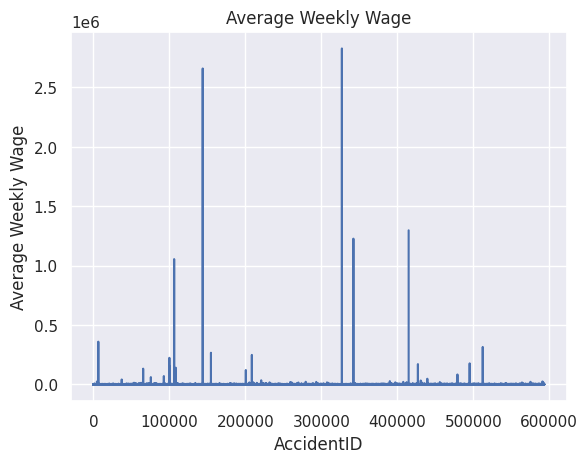

491.0883206784323 0.0


In [35]:
plt.plot(train_data['Average Weekly Wage'])
plt.xlabel('AccidentID')
plt.ylabel('Average Weekly Wage')
plt.title('Average Weekly Wage')
plt.show()

print(train_data['Average Weekly Wage'].mean(), train_data['Average Weekly Wage'].median())

Fills the missing values of the Average Weekly Wage with the mean cause it isn't 0.

In [36]:
train_data['Average Weekly Wage'] = train_data['Average Weekly Wage'].fillna(train_data['Average Weekly Wage'].mean())

<ipython-input-36-9d283775065a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Average Weekly Wage'] = train_data['Average Weekly Wage'].fillna(train_data['Average Weekly Wage'].mean())


In [37]:
train_data.isna().sum()

,0
Accident Date,3689
Age at Injury,0
Alternative Dispute Resolution,0
Assembly Date,0
Attorney/Representative,0
Average Weekly Wage,0
Birth Year,0
C-2 Date,14560
C-3 Date,386781
Carrier Name,0


<a class="anchor" id="4th-bullet">


### Checks the Accident Date missing values
</a>

In [38]:
train_data['Accident Date'] = pd.to_datetime(train_data['Accident Date'])

<ipython-input-38-fa3e16ea68d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Accident Date'] = pd.to_datetime(train_data['Accident Date'])


In [39]:
train_data[train_data['Accident Date'].isna()]['Age at Injury'].unique()

array([0.])

Since the only claimers that appear to be missing on the **Accident Date**, have just been born 0.0 years, so we will drop these rows.

In [40]:
train_data.dropna(subset = ['Accident Date'], inplace = True)

<ipython-input-40-c84e56d5517f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.dropna(subset = ['Accident Date'], inplace = True)


In [41]:
train_data.isna().sum()

,0
Accident Date,0
Age at Injury,0
Alternative Dispute Resolution,0
Assembly Date,0
Attorney/Representative,0
Average Weekly Wage,0
Birth Year,0
C-2 Date,12991
C-3 Date,386539
Carrier Name,0


<a class="anchor" id="4th-bullet">


### Checks the C-2 Date and C-3 Date missing values
</a>

Using C-2 and C-3 Date, I'm going to calculate the interval between both dates

In [42]:
train_data['C-2 Date'] = pd.to_datetime(train_data['C-2 Date'])
train_data['C-3 Date'] = pd.to_datetime(train_data['C-3 Date'])

train_data.dtypes

<ipython-input-42-8816178d8edd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['C-2 Date'] = pd.to_datetime(train_data['C-2 Date'])
<ipython-input-42-8816178d8edd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['C-3 Date'] = pd.to_datetime(train_data['C-3 Date'])


,0
Accident Date,datetime64[ns]
Age at Injury,float64
Alternative Dispute Resolution,object
Assembly Date,object
Attorney/Representative,object
Average Weekly Wage,float64
Birth Year,float64
C-2 Date,datetime64[ns]
C-3 Date,datetime64[ns]
Carrier Name,object


In [43]:
train_data[['C-3 Date', 'C-2 Date']].head(50)
train_data['Interval C2 -> C3'] = train_data['C-3 Date'] - train_data['C-2 Date']
train_data['Interval C2 -> C3'].dropna().mean()

#570337 rows × 33 columns

<ipython-input-43-f9fb8df913d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Interval C2 -> C3'] = train_data['C-3 Date'] - train_data['C-2 Date']


Timedelta('15 days 05:11:48.526868960')

The mean interval between both dates are 15 days, \
C-3 Date happens 15 days after C-2 Date

In [44]:
train_data[(train_data['C-3 Date'].isnull()) & (train_data['C-2 Date'].isnull())]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,Interval C2 -> C3
262,2019-06-26,0.0,N,2020-01-02,N,0.000000,0.0,NaT,NaT,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,5393971,2. NON-COMP,NASSAU,N,NYC,NaN,M,NaN,HEALTH CARE AND SOCIAL ASSISTANCE,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,NaN,NaN,NaN,NaN,NaN,11801,0.0,Not Work Related,1.0,NaT
366,2001-09-12,49.0,N,2020-01-02,Y,0.000000,1952.0,NaT,NaT,*** CARRIER UNDETERMINED ***,UNKNOWN,5393964,2. NON-COMP,NEW YORK,N,STATEWIDE,NaN,M,NaN,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,11756,0.0,Not Work Related,6.0,NaT
368,2019-11-14,56.0,N,2020-01-02,N,0.000000,0.0,NaT,NaT,SAFETY NATIONAL CASUALTY CORP,1A. PRIVATE,5393769,1. CANCELLED,ORANGE,N,ALBANY,NaN,M,NaN,RETAIL TRADE,RETAIL TRADE,UK,NaN,NaN,NaN,NaN,NaN,NaN,18426,0.0,Not Work Related,6.0,NaT
506,2016-05-31,51.0,N,2020-01-02,N,491.088321,1965.0,NaT,NaT,AMERICAN CASUALTY CO OF,1A. PRIVATE,5393878,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,NaN,F,NaN,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,11772,0.0,Not Work Related,0.0,NaT
845,2019-05-28,50.0,N,2020-01-03,N,0.000000,1968.0,NaT,NaT,SENTRY INSURANCE A MUTUAL CO,1A. PRIVATE,5394397,1. CANCELLED,RENSSELAER,N,ALBANY,NaN,F,NaN,NaN,NaN,I,NaN,NaN,NaN,NaN,NaN,NaN,12061,0.0,Not Work Related,5.0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592734,2022-12-15,22.0,Y,2022-12-29,N,0.000000,2000.0,NaT,NaT,ELECTRICAL EMPLOYERS,4A. SELF PRIVATE,6163508,2. NON-COMP,KINGS,N,NYC,NaN,M,NaN,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,11203,0.0,Not Work Related,6.0,NaT
592744,2022-12-15,36.0,Y,2022-12-29,N,0.000000,1986.0,NaT,NaT,ELECTRICAL EMPLOYERS SELF,4A. SELF PRIVATE,6163387,2. NON-COMP,NASSAU,N,NYC,NaN,M,NaN,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,11762,0.0,Not Work Related,0.0,NaT
593060,2022-12-19,56.0,Y,2022-12-30,N,0.000000,1966.0,NaT,NaT,ELECTRICAL EMPLOYERS,4A. SELF PRIVATE,6164215,2. NON-COMP,RICHMOND,N,NYC,NaN,M,NaN,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,10312,0.0,Not Work Related,2.0,NaT
593083,2022-12-15,43.0,Y,2022-12-30,N,0.000000,1979.0,NaT,NaT,ELECTRICAL EMPLOYERS,4A. SELF PRIVATE,6164859,2. NON-COMP,NEW YORK,N,NYC,NaN,M,NaN,WHOLESALE TRADE,WHOLESALE TRADE,IV,NaN,NaN,NaN,NaN,NaN,NaN,10002,0.0,Not Work Related,5.0,NaT


In [45]:
train_data['C-3 Date'].fillna(train_data['C-2 Date'] + pd.Timedelta(days=15), inplace = True)
train_data['C-2 Date'].fillna(train_data['C-3 Date'] - pd.Timedelta(days=15), inplace = True)

<ipython-input-45-20d7feca0381>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['C-3 Date'].fillna(train_data['C-2 Date'] + pd.Timedelta(days=15), inplace = True)
<ipython-input-45-20d7feca0381>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['C-3 Date'].fillna(train_data['C-2 Date'] + pd.Timedelta(days=15), inplace = T

Now going to deal with the values that have both C-2 and C-3 Date missing

In [46]:
train_data[['Accident Date', 'C-2 Date', 'C-3 Date']].head(50)
train_data['Interval ADate -> C2'] = train_data['C-2 Date'] - train_data['Accident Date']
train_data['Interval ADate -> C2'].dropna().mean()

<ipython-input-46-c455283a1e88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Interval ADate -> C2'] = train_data['C-2 Date'] - train_data['Accident Date']


Timedelta('72 days 14:07:52.526560956')

Between **Accident Date** and **C-2 Date** there is an interval of 72 days in average.

In [47]:
train_data['C-2 Date'].fillna(train_data['Accident Date'] - pd.Timedelta(days=72), inplace = True)

<ipython-input-47-fe95416e5471>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['C-2 Date'].fillna(train_data['Accident Date'] - pd.Timedelta(days=72), inplace = True)
<ipython-input-47-fe95416e5471>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['C-2 Date'].fillna(train_data['Accident Date'] - pd.Timedelta(days=72), i

In [48]:
train_data['Interval ADate -> C3'] = train_data['C-3 Date'] - train_data['Accident Date']
train_data['Interval ADate -> C3'].dropna().mean()

<ipython-input-48-9c184f5b6353>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Interval ADate -> C3'] = train_data['C-3 Date'] - train_data['Accident Date']


Timedelta('87 days 15:45:41.013942505')

Between **Accident Date** and **C-3 Date** there is an interval of 87 days

In [49]:
train_data['C-3 Date'].fillna(train_data['Accident Date'] + pd.Timedelta(days=87), inplace = True)

<ipython-input-49-ca980a37dedf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['C-3 Date'].fillna(train_data['Accident Date'] + pd.Timedelta(days=87), inplace = True)
<ipython-input-49-ca980a37dedf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['C-3 Date'].fillna(train_data['Accident Date'] + pd.Timedelta(days=87), i

In [50]:
train_data.isna().sum()

,0
Accident Date,0
Age at Injury,0
Alternative Dispute Resolution,0
Assembly Date,0
Attorney/Representative,0
Average Weekly Wage,0
Birth Year,0
C-2 Date,0
C-3 Date,0
Carrier Name,0


<a class="anchor" id="4th-bullet">


### Checks the First Hearing Date missing values
</a>

It says that a missing value here means that the claim has not yet had a hearing held. So will stay with missing values. However we can calculate the mean interval between it and **Accident Date**, just like the **C-2 Date** and **C-3 Date**.

In [51]:
#train_data['First Hearing Date'] = pd.to_datetime(train_data['First Hearing Date'])
#train_data['First Hearing Date'].dropna()

<a class="anchor" id="4th-bullet">


### Checks the IME-4 Count missing values
</a>

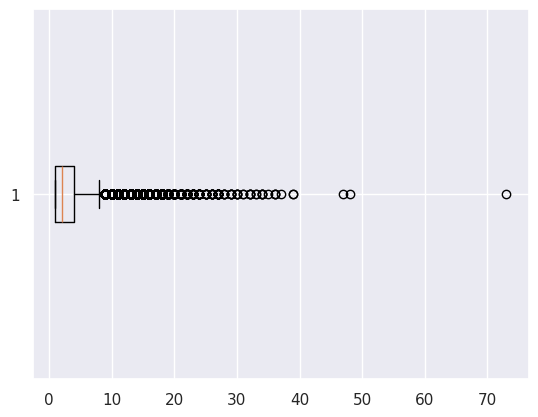

In [52]:
train_data['IME-4 Count']
plt.boxplot(train_data['IME-4 Count'].dropna(), vert = False)
plt.show()

It feels that filling with the median the missing values would be accurate since there are outrageous outliers.

In [53]:
train_data['IME-4 Count'].fillna(train_data['IME-4 Count'].median(), inplace = True)

<ipython-input-53-25d887d68690>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['IME-4 Count'].fillna(train_data['IME-4 Count'].median(), inplace = True)
<ipython-input-53-25d887d68690>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['IME-4 Count'].fillna(train_data['IME-4 Count'].median(), inplace = True)


<a class="anchor" id="4th-bullet">


### Checks the Industry Code missing values
</a>

In [54]:
train_data.isna().sum()

,0
Accident Date,0
Age at Injury,0
Alternative Dispute Resolution,0
Assembly Date,0
Attorney/Representative,0
Average Weekly Wage,0
Birth Year,0
C-2 Date,0
C-3 Date,0
Carrier Name,0


In [55]:
train_data[train_data['Industry Code'].isna()][['Industry Code', 'Industry Code Description', 'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Code', 'WCIO Part Of Body Description']]

,Industry Code,Industry Code Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
593224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593291,NaN,NaN,NaN,NaN,NaN,NaN,-9.0,MULTIPLE
593353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It appears that no information about the **Industry Code** has also missing values in the **WCIO** pairs, so will drop them.

In [56]:
train_data = train_data.dropna(axis = 0, how = 'all', subset = ['Industry Code', 'Industry Code Description', 'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Code', 'WCIO Part Of Body Description'])

In [57]:
train_data[train_data['Industry Code'].isna()][['Industry Code', 'Industry Code Description', 'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Code', 'WCIO Part Of Body Description']]

,Industry Code,Industry Code Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description
379,NaN,NaN,99.0,"OTHER - MISCELLANEOUS, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",38.0,SHOULDER(S)
433,NaN,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",40.0,LACERATION,35.0,HAND
627,NaN,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",52.0,STRAIN OR TEAR,33.0,LOWER ARM
701,NaN,NaN,17.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,35.0,HAND
714,NaN,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA
...,...,...,...,...,...,...,...,...
591809,NaN,NaN,31.0,"FALL, SLIP OR TRIP, NOC",28.0,FRACTURE,52.0,UPPER LEG
591929,NaN,NaN,60.0,"STRAIN OR INJURY BY, NOC",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA
591946,NaN,NaN,13.0,"CAUGHT IN, UNDER OR BETWEEN, NOC",10.0,CONTUSION,-9.0,MULTIPLE
592839,NaN,NaN,81.0,"STRUCK OR INJURED, NOC",10.0,CONTUSION,14.0,EYE(S)


Will create a new code 0.0 for Unkwnown Industry

In [58]:
train_data['Industry Code'].fillna(0.0, inplace = True)
train_data['Industry Code Description'].fillna('Unknown', inplace = True)

<ipython-input-58-8129e57624ee>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Industry Code'].fillna(0.0, inplace = True)
<ipython-input-58-8129e57624ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Industry Code'].fillna(0.0, inplace = True)
<ipython-input-58-8129e57624ee>:2: FutureWarning: A value is trying to 

<a class="anchor" id="4th-bullet">


### Checks the WCIO Cause of Injury missing values
</a>

In [59]:
train_data[train_data['WCIO Cause of Injury Code'].isna()][['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Code', 'WCIO Part Of Body Description']]

,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description
210,NaN,NaN,NaN,NaN,NaN,NaN
262,NaN,NaN,NaN,NaN,NaN,NaN
327,NaN,NaN,NaN,NaN,NaN,NaN
368,NaN,NaN,NaN,NaN,NaN,NaN
406,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
593028,NaN,NaN,NaN,NaN,NaN,NaN
593048,NaN,NaN,NaN,NaN,NaN,NaN
593083,NaN,NaN,NaN,NaN,NaN,NaN
593162,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
train_data = train_data.dropna(axis = 0, how = 'all', subset = ['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Code', 'WCIO Part Of Body Description'])

In [61]:
train_data[train_data['WCIO Cause of Injury Code'].isna()][['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Code', 'WCIO Part Of Body Description']]

,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description
2051,NaN,NaN,NaN,NaN,20.0,MULTIPLE NECK INJURY
2894,NaN,NaN,NaN,NaN,53.0,KNEE
3731,NaN,NaN,NaN,NaN,42.0,LOWER BACK AREA
3990,NaN,NaN,NaN,NaN,38.0,SHOULDER(S)
5461,NaN,NaN,NaN,NaN,42.0,LOWER BACK AREA
...,...,...,...,...,...,...
589440,NaN,NaN,NaN,NaN,18.0,SOFT TISSUE
590491,NaN,NaN,NaN,NaN,51.0,HIP
593007,NaN,NaN,59.0,"ALL OTHER SPECIFIC INJURIES, NOC",42.0,LOWER BACK AREA
593008,NaN,NaN,NaN,NaN,-9.0,MULTIPLE


In [62]:
train_data['WCIO Cause of Injury Code'].fillna(0.0, inplace = True)
train_data['WCIO Cause of Injury Description'].fillna('Unknown', inplace = True)

<ipython-input-62-825d87df4892>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['WCIO Cause of Injury Code'].fillna(0.0, inplace = True)
<ipython-input-62-825d87df4892>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['WCIO Cause of Injury Code'].fillna(0.0, inplace = True)
<ipython-input-62-825d87df4892>:2: FutureWarnin

<a class="anchor" id="4th-bullet">


### Checks the WCIO Nature of Injury missing values
</a>

In [63]:
train_data[train_data['WCIO Nature of Injury Code'].isna()][['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Code', 'WCIO Part Of Body Description']]

,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description
2051,NaN,NaN,20.0,MULTIPLE NECK INJURY
2894,NaN,NaN,53.0,KNEE
3731,NaN,NaN,42.0,LOWER BACK AREA
3990,NaN,NaN,38.0,SHOULDER(S)
5461,NaN,NaN,42.0,LOWER BACK AREA
...,...,...,...,...
589338,NaN,NaN,-9.0,MULTIPLE
589440,NaN,NaN,18.0,SOFT TISSUE
590491,NaN,NaN,51.0,HIP
593008,NaN,NaN,-9.0,MULTIPLE


In [64]:
train_data = train_data.dropna(axis = 0, how = 'all', subset = ['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Code', 'WCIO Part Of Body Description'])

In [65]:
train_data[train_data['WCIO Nature of Injury Code'].isna()][['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Code', 'WCIO Part Of Body Description']]

,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description
2051,NaN,NaN,20.0,MULTIPLE NECK INJURY
2894,NaN,NaN,53.0,KNEE
3731,NaN,NaN,42.0,LOWER BACK AREA
3990,NaN,NaN,38.0,SHOULDER(S)
5461,NaN,NaN,42.0,LOWER BACK AREA
...,...,...,...,...
589338,NaN,NaN,-9.0,MULTIPLE
589440,NaN,NaN,18.0,SOFT TISSUE
590491,NaN,NaN,51.0,HIP
593008,NaN,NaN,-9.0,MULTIPLE


In [66]:
train_data['WCIO Nature of Injury Code'].fillna(0.0, inplace = True)
train_data['WCIO Nature of Injury Description'].fillna('Unknown', inplace = True)

<ipython-input-66-ad1fd2fe0415>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['WCIO Nature of Injury Code'].fillna(0.0, inplace = True)
<ipython-input-66-ad1fd2fe0415>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['WCIO Nature of Injury Code'].fillna(0.0, inplace = True)
<ipython-input-66-ad1fd2fe0415>:2: FutureWarn

In [67]:
train_data.isna().sum()

,0
Accident Date,0
Age at Injury,0
Alternative Dispute Resolution,0
Assembly Date,0
Attorney/Representative,0
Average Weekly Wage,0
Birth Year,0
C-2 Date,0
C-3 Date,0
Carrier Name,0


<a class="anchor" id="4th-bullet">


### Checks the WCIO Part of Body missing values
</a>

In [68]:
train_data[train_data['WCIO Part Of Body Code'].isna()][['WCIO Part Of Body Code', 'WCIO Part Of Body Description']]

,WCIO Part Of Body Code,WCIO Part Of Body Description
480,NaN,NaN
708,NaN,NaN
1092,NaN,NaN
1833,NaN,NaN
2030,NaN,NaN
...,...,...
591919,NaN,NaN
592091,NaN,NaN
592118,NaN,NaN
592848,NaN,NaN


In [69]:
train_data['WCIO Part Of Body Code'].fillna(0.0, inplace = True)
train_data['WCIO Part Of Body Description'].fillna('Unknown', inplace = True)

<ipython-input-69-a717c7d8d96f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['WCIO Part Of Body Code'].fillna(0.0, inplace = True)
<ipython-input-69-a717c7d8d96f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [75]:
train_data['WCIO Part Of Body Code'].unique()
#  -9

array([62., 38., 10., 36., 60., 14., 55., 53., 37., 42., 61., 54., 51.,
       52., 17., 34., 23., 35., 18., 31., 56., 32., 30., 90., 91., 20.,
       44., 39., 13., 50., 22., 33., -9., 41., 11., 57., 19., 16., 66.,
       40., 99., 65., 46., 15., 58.,  0., 48., 49., 21., 63., 12., 45.,
       64., 24., 26.])

<a class="anchor" id="4th-bullet">


### Checks the Zip Code missing values
</a>

In [70]:
train_data['Zip Code'].unique()

array(['13662', '14569', '12589', ..., 'G9B0Y', '15143', '07122'],
      dtype=object)

In [71]:
train_data[train_data['Zip Code'].notna()].head(10)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,Interval C2 -> C3,Interval ADate -> C2,Interval ADate -> C3
0,2019-12-30,31.0,N,2020-01-01,N,0.000000,1988.0,2019-12-31,2020-01-15,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,2.0,RETAIL TRADE,RETAIL TRADE,I,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0,NaT,1 days,16 days
1,2019-08-30,46.0,N,2020-01-01,Y,1745.930000,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,CONSTRUCTION,CONSTRUCTION,I,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0,13 days,124 days,137 days
2,2019-12-06,40.0,N,2020-01-01,N,1434.800000,1979.0,2020-01-01,2020-01-16,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,2.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,17.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0,NaT,26 days,41 days
4,2019-12-30,61.0,N,2020-01-01,N,491.088321,1958.0,2019-12-31,2020-01-15,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,2.0,HEALTH CARE AND SOCIAL ASSISTANCE,HEALTH CARE AND SOCIAL ASSISTANCE,II,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0,NaT,1 days,16 days
5,2019-12-26,67.0,N,2020-01-01,N,0.000000,1952.0,2019-12-31,2020-01-15,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,5393863,3. MED ONLY,SUFFOLK,N,HAUPPAUGE,NaN,M,2.0,RETAIL TRADE,RETAIL TRADE,IV,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0.0,Not Work Related,5.0,NaT,5 days,20 days
6,2019-12-28,48.0,N,2020-01-01,N,0.000000,1971.0,2019-12-31,2020-01-15,LM INSURANCE CORP,1A. PRIVATE,5393848,2. NON-COMP,ONONDAGA,N,SYRACUSE,NaN,M,2.0,ACCOMMODATION AND FOOD SERVICES,ACCOMMODATION AND FOOD SERVICES,I,19.0,"CUT, PUNCTURE, SCRAPE, NOC",40.0,LACERATION,36.0,FINGER(S),13029,0.0,Not Work Related,1.0,NaT,3 days,18 days
7,2019-12-30,33.0,N,2020-01-01,N,0.000000,1986.0,2019-12-31,2020-03-04,STATE INSURANCE FUND,2A. SIF,5394182,2. NON-COMP,RICHMOND,N,NYC,NaN,F,2.0,HEALTH CARE AND SOCIAL ASSISTANCE,HEALTH CARE AND SOCIAL ASSISTANCE,IV,99.0,"OTHER - MISCELLANEOUS, NOC",71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",38.0,SHOULDER(S),10305,0.0,Not Work Related,6.0,64 days,1 days,65 days
8,2019-12-23,55.0,N,2020-01-01,N,0.000000,1964.0,2020-01-01,2020-01-16,"ROCHESTER, UNIVERSITY OF",4A. SELF PRIVATE,5393881,2. NON-COMP,MONROE,N,ROCHESTER,NaN,F,2.0,EDUCATIONAL SERVICES,EDUCATIONAL SERVICES,II,99.0,"OTHER - MISCELLANEOUS, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",60.0,LUNGS,14620,0.0,Not Work Related,6.0,NaT,9 days,24 days
9,2019-12-29,20.0,N,2020-01-01,N,225.000000,2004.0,2019-12-31,2020-01-15,LM INSURANCE CORP,1A. PRIVATE,5394084,3. MED ONLY,KINGS,N,NYC,NaN,F,2.0,RETAIL TRADE,RETAIL TRADE,IV,81.0,"STRUCK OR INJURED, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",14.0,EYE(S),11231,0.0,Not Work Related,6.0,NaT,2 days,17 days
10,2019-12-28,48.0,N,2020-01-01,N,0.000000,1971.0,2019-12-31,2020-01-15,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5394003,2. NON-COMP,ORANGE,N,ALBANY,NaN,F,2.0,RETAIL TRADE,RETAIL TRADE,II,81.0,"STRUCK OR INJURED, NOC",10.0,CONTUSION,55.0,ANKLE,12550,0.0,Not Work Related,1.0,NaT,3 days,18 days


In [72]:
train_data = train_data.iloc[:, :-3]
train_data

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.000000,1988.0,2019-12-31,2020-01-15,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,2.0,RETAIL TRADE,RETAIL TRADE,I,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.930000,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,CONSTRUCTION,CONSTRUCTION,I,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.800000,1979.0,2020-01-01,2020-01-16,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,2.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,17.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
4,2019-12-30,61.0,N,2020-01-01,N,491.088321,1958.0,2019-12-31,2020-01-15,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,2.0,HEALTH CARE AND SOCIAL ASSISTANCE,HEALTH CARE AND SOCIAL ASSISTANCE,II,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
5,2019-12-26,67.0,N,2020-01-01,N,0.000000,1952.0,2019-12-31,2020-01-15,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,5393863,3. MED ONLY,SUFFOLK,N,HAUPPAUGE,NaN,M,2.0,RETAIL TRADE,RETAIL TRADE,IV,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0.0,Not Work Related,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593451,2022-12-14,35.0,N,2022-12-30,N,0.000000,1987.0,2022-12-30,2023-01-14,STATE INSURANCE FUND,2A. SIF,6165265,2. NON-COMP,BRONX,N,NYC,NaN,M,2.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,IV,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,10.0,CONTUSION,42.0,LOWER BACK AREA,10467,0.0,Not Work Related,4.0
593455,2022-12-15,33.0,N,2022-12-31,N,0.000000,1989.0,2022-12-31,2023-01-15,WESCO INSURANCE CO,1A. PRIVATE,6165285,2. NON-COMP,NASSAU,N,NYC,NaN,M,2.0,HEALTH CARE AND SOCIAL ASSISTANCE,HEALTH CARE AND SOCIAL ASSISTANCE,IV,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",37.0,INFLAMMATION,35.0,HAND,11590,0.0,Not Work Related,6.0
593456,2022-12-13,61.0,N,2022-12-31,N,991.080000,1961.0,2022-12-31,2023-01-15,SECURITY NATIONAL INSURANCE CO,1A. PRIVATE,6165506,4. TEMPORARY,ERIE,N,BUFFALO,NaN,F,1.0,HEALTH CARE AND SOCIAL ASSISTANCE,HEALTH CARE AND SOCIAL ASSISTANCE,II,98.0,"CUMULATIVE, NOC",80.0,"ALL OTHER CUMULATIVE INJURY, NOC",34.0,WRIST,14227,0.0,Not Work Related,3.0
593457,2022-12-14,24.0,N,2022-12-31,N,0.000000,1998.0,2022-12-31,2023-01-15,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,6165339,2. NON-COMP,NEW YORK,N,NYC,NaN,F,2.0,HEALTH CARE AND SOCIAL ASSISTANCE,HEALTH CARE AND SOCIAL ASSISTANCE,IV,59.0,USING TOOL OR MACHINERY,59.0,"ALL OTHER SPECIFIC INJURIES, NOC",55.0,ANKLE,10029,0.0,Not Work Related,5.0


In [73]:
train_data.isna().sum()

,0
Accident Date,0
Age at Injury,0
Alternative Dispute Resolution,0
Assembly Date,0
Attorney/Representative,0
Average Weekly Wage,0
Birth Year,0
C-2 Date,0
C-3 Date,0
Carrier Name,0


In [74]:
train_data['WCB Decision'].unique()

array(['Not Work Related'], dtype=object)

# Dealing with errors

## Average Weekly wage = 0